# 分析目标

1. 用户注册地
2. 活动省份
3. 交易时间
4. 电子券类型、小类型
5. 电子券使用渠道
6. 电子券面额
7. 电子券剩余数量

In [3]:
import os 
import sys 

os.environ['PYTHONPATH'] = 'D:\\自己\\Competition\\2025-SINOPEC-08\\'
sys.path.append('D:\\自己\\Competition\\2025-SINOPEC-08\\')
os.chdir('D:\\自己\\Competition\\2025-SINOPEC-08\\')
print(sys.path)
import pandas as pd 
import os 


class DataLoader:
    def __init__(self, data_path):
        self.data_path = data_path
        self.train_use_df = pd.read_csv(os.path.join(self.data_path, 'train_use.csv'))
        self.valid_use_df = pd.read_csv(os.path.join(self.data_path, 'valid_use.csv'))
        self.train_send_df = pd.read_csv(os.path.join(self.data_path, 'train_send.csv'))
        self.valid_send_df = pd.read_csv(os.path.join(self.data_path, 'valid_send.csv'))
        self.train_wallet_df = pd.read_csv(os.path.join(self.data_path, 'train_wallet.csv'))
        self.valid_wallet_df = pd.read_csv(os.path.join(self.data_path, 'valid_wallet.csv'))


data_loader = DataLoader('./data/train_data')

['g:\\ProgramFiles\\miniconda\\python310.zip', 'g:\\ProgramFiles\\miniconda\\DLLs', 'g:\\ProgramFiles\\miniconda\\lib', 'g:\\ProgramFiles\\miniconda', '', 'C:\\Users\\94302\\AppData\\Roaming\\Python\\Python310\\site-packages', 'g:\\ProgramFiles\\miniconda\\lib\\site-packages', 'g:\\ProgramFiles\\miniconda\\lib\\site-packages\\win32', 'g:\\ProgramFiles\\miniconda\\lib\\site-packages\\win32\\lib', 'g:\\ProgramFiles\\miniconda\\lib\\site-packages\\Pythonwin', 'D:\\自己\\Competition\\2025-SINOPEC-08\\', 'D:\\自己\\Competition\\2025-SINOPEC-08\\', 'D:\\自己\\Competition\\2025-SINOPEC-08\\']


## 用户注册地

In [62]:
len(data_loader.train_wallet_df), len(data_loader.train_wallet_df['membercode'].unique())

(407043, 23909)

In [ ]:
data_loader.valid_wallet_df.head(3)

,order_no,external_order_no,user_id,membercode,station_code,station_name,sale_time,tran_amt,receivable_amt,discounts_amt,point_amt,coupon_amt,attributionorgcode,transactionorgcode,coupon_code
0,33303134PCITC2025042050490,33303134204250420170534641,3e3fbf3f904109217f7c55c3afe31955,1045014565571,33303134,平南三环加油站,2023/4/20 17:05,100.0,100.0,0.0,0.0,8.0,45.0,45,91145N50325M1CWZm13Al
1,33301112PCITC2025042050046,33301112791250420091826094,0ed335c7397ff42e77f5fc452f68fcbd,1045003646892,33301112,港水营加油站,2023/4/20 9:18,200.0,200.0,0.0,0.0,0.0,45.0,45,NaN
2,33303794PCITC2025042050177,33303794633250420160328242,50d10ca04a2c584543f8b7ec932be2a6,1045001263505,33303794,覃塘仙衣路加油站,2023/4/20 16:03,166.0,166.0,0.0,0.0,0.0,45.0,45,NaN


In [9]:
data_loader.valid_wallet_df['attributionorgcode'].unique()

array([45., nan, 34., 64., 14., 42., 33., 31., 13., 43., 32., 36., 44.,
       61., 21., 11., 37., 23., 65., 62., 51., 52., 41., 35., 53., 46.,
       22., 15., 12., 50., 91.])

In [10]:
valid_df = data_loader.valid_wallet_df

In [49]:
len(valid_df), len(valid_df['station_code'].unique())

(83899, 9283)

In [11]:
valid_df['use_coupon'] = valid_df['coupon_code'].isna()
valid_df.head(3)

,order_no,external_order_no,user_id,membercode,station_code,station_name,sale_time,tran_amt,receivable_amt,discounts_amt,point_amt,coupon_amt,attributionorgcode,transactionorgcode,coupon_code,use_coupon
0,33303134PCITC2025042050490,33303134204250420170534641,3e3fbf3f904109217f7c55c3afe31955,1045014565571,33303134,平南三环加油站,2023/4/20 17:05,100.0,100.0,0.0,0.0,8.0,45.0,45,91145N50325M1CWZm13Al,False
1,33301112PCITC2025042050046,33301112791250420091826094,0ed335c7397ff42e77f5fc452f68fcbd,1045003646892,33301112,港水营加油站,2023/4/20 9:18,200.0,200.0,0.0,0.0,0.0,45.0,45,NaN,True
2,33303794PCITC2025042050177,33303794633250420160328242,50d10ca04a2c584543f8b7ec932be2a6,1045001263505,33303794,覃塘仙衣路加油站,2023/4/20 16:03,166.0,166.0,0.0,0.0,0.0,45.0,45,NaN,True


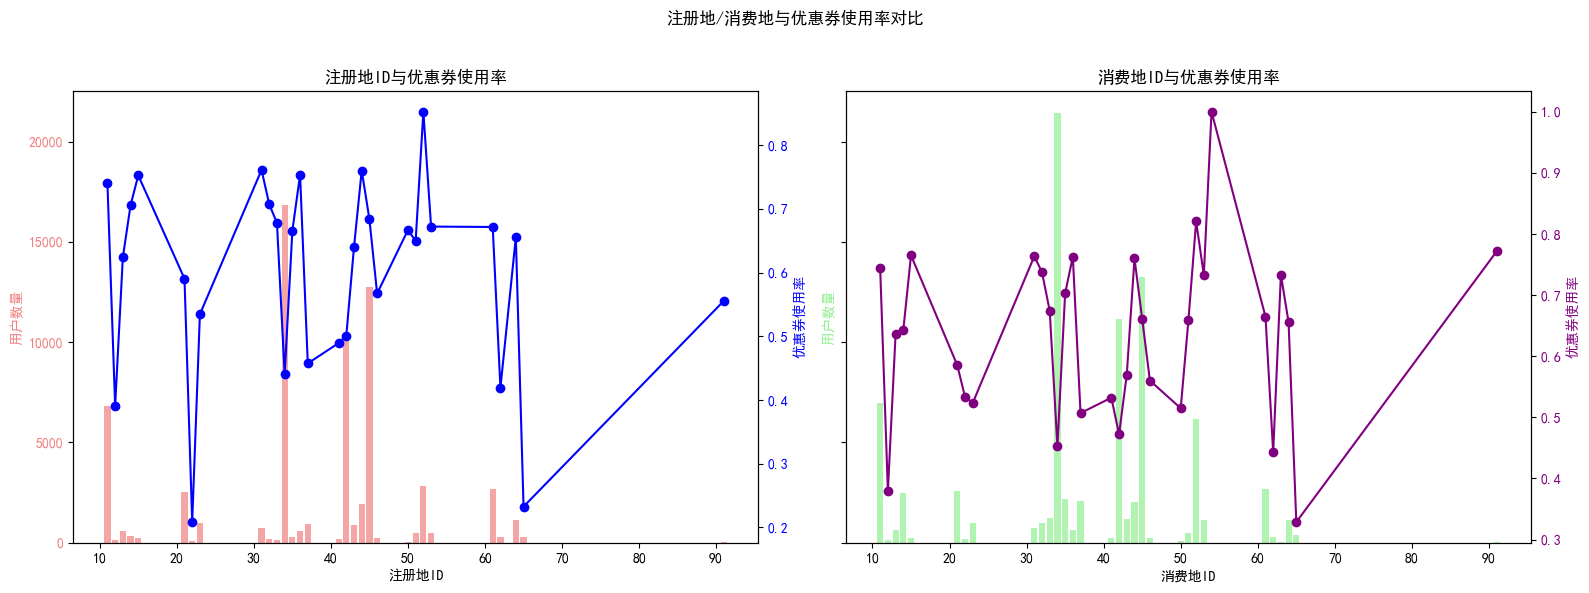

In [19]:
# 画一个左右双栏的图，左侧是注册地与优惠券使用比例，右侧是消费地与优惠券使用比例
import matplotlib.pyplot as plt

# 设置matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# 左侧：注册地
attr_user_counts = valid_df.groupby('attributionorgcode').size()
attr_use_coupon_rate = valid_df.groupby('attributionorgcode')['use_coupon'].mean()
x1 = attr_user_counts.index

axes[0].bar(x1, attr_user_counts.values, color='lightcoral', alpha=0.7, label='用户数量')
axes0_twin = axes[0].twinx()
axes0_twin.plot(x1, attr_use_coupon_rate.values, color='blue', marker='o', label='优惠券使用率')
axes[0].set_xlabel('注册地ID')
axes[0].set_ylabel('用户数量', color='lightcoral')
axes0_twin.set_ylabel('优惠券使用率', color='blue')
axes[0].set_title('注册地ID与优惠券使用率')
axes[0].tick_params(axis='y', labelcolor='lightcoral')
axes0_twin.tick_params(axis='y', labelcolor='blue')

# 右侧：消费地
trans_user_counts = valid_df.groupby('transactionorgcode').size()
trans_use_coupon_rate = valid_df.groupby('transactionorgcode')['use_coupon'].mean()
x2 = trans_user_counts.index

axes[1].bar(x2, trans_user_counts.values, color='lightgreen', alpha=0.7, label='用户数量')
axes1_twin = axes[1].twinx()
axes1_twin.plot(x2, trans_use_coupon_rate.values, color='purple', marker='o', label='优惠券使用率')
axes[1].set_xlabel('消费地ID')
axes[1].set_ylabel('用户数量', color='lightgreen')
axes1_twin.set_ylabel('优惠券使用率', color='purple')
axes[1].set_title('消费地ID与优惠券使用率')
axes[1].tick_params(axis='y', labelcolor='lightgreen')
axes1_twin.tick_params(axis='y', labelcolor='purple')

plt.suptitle('注册地/消费地与优惠券使用率对比')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [22]:
# 根据注册地与消费地点预测优惠券使用
# build vocab 
place_vocab = {999:0} 
for idx, row in valid_df.iterrows():
    regis_place = row['attributionorgcode']
    trans_place = row['transactionorgcode']
    if pd.isna(regis_place) or pd.isna(trans_place):
        continue 
    regis_place = int(regis_place) 
    trans_place = int(trans_place) 
    
    if regis_place not in place_vocab:
        place_vocab[regis_place] = len(place_vocab) 
    if trans_place not in place_vocab: 
        place_vocab[trans_place] = len(place_vocab)  
print(place_vocab)

{999: 0, 45: 1, 34: 2, 64: 3, 14: 4, 42: 5, 33: 6, 31: 7, 13: 8, 43: 9, 32: 10, 36: 11, 44: 12, 61: 13, 21: 14, 11: 15, 37: 16, 23: 17, 65: 18, 62: 19, 51: 20, 52: 21, 41: 22, 35: 23, 53: 24, 15: 25, 46: 26, 22: 27, 12: 28, 54: 29, 50: 30, 91: 31, 63: 32}


In [ ]:
from sklearn.linear_model import LogisticRegression
# build one-hot feature
features = [] 
labels = [] 
for idx, row in valid_df.iterrows():
    regis_place = row['attributionorgcode']
    trans_place = row['transactionorgcode']
    if pd.isna(regis_place):
        regis_place = 999 
    if pd.isna(trans_place):
        trans_place = 999

    regis_place = int(regis_place) 
    trans_place = int(trans_place) 

    regis_feature = [0] * len(place_vocab)
    trans_feature = [0] * len(place_vocab) 
    regis_feature[place_vocab[regis_place]] = 1 
    trans_feature[place_vocab[trans_place]] = 1 
    same_feature = 1 if regis_place == trans_place else 0  

    label = 1 if row['use_coupon'] else 0 
    features.append(regis_feature+trans_feature+[same_feature]) 
    labels.append(label)  
model = LogisticRegression()
model.fit(features, labels)

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [44]:
model = LogisticRegression()
# model = SGDClassifier()

In [57]:
model.fit(features, labels)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [58]:
res = model.predict_proba(features)
print(res)


[[0.31969833 0.68030167]
 [0.31969833 0.68030167]
 [0.31969833 0.68030167]
 ...
 [0.54808127 0.45191873]
 [0.50288632 0.49711368]
 [0.50288632 0.49711368]]


In [59]:
res = model.predict_proba(features)
data = [x[1] for x in res]
print(data[0])

0.6803016748321334


In [61]:
from sklearn.metrics import roc_auc_score, auc

print(roc_auc_score(labels, data))

0.6675576204664635


皮尔逊相关系数: -0.0738, p值: 0.6983
斯皮尔曼相关系数: -0.0941, p值: 0.6209


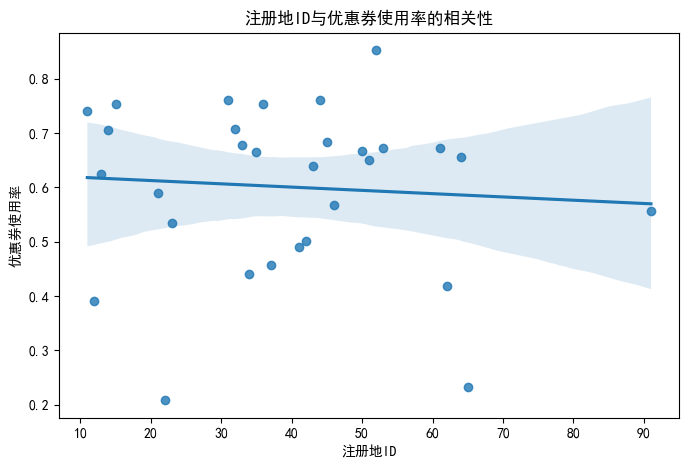

In [18]:
# 使用sklearn计算皮尔逊相关系数
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
import seaborn as sns

# 取注册地ID和优惠券使用率
x = user_counts.index.values
y = use_coupon_rate.values

# 皮尔逊相关系数
pearson_corr, pearson_p = pearsonr(x, y)
print(f"皮尔逊相关系数: {pearson_corr:.4f}, p值: {pearson_p:.4g}")

# 斯皮尔曼相关系数
spearman_corr, spearman_p = spearmanr(x, y)
print(f"斯皮尔曼相关系数: {spearman_corr:.4f}, p值: {spearman_p:.4g}")

# 用seaborn画散点图并拟合回归线
plt.figure(figsize=(8,5))
sns.regplot(x=x, y=y)
plt.xlabel('注册地ID')
plt.ylabel('优惠券使用率')
plt.title('注册地ID与优惠券使用率的相关性')
plt.show()
